In [258]:
import pandas as pd

In [259]:
data  = pd.read_csv('train.csv', lineterminator='\r', encoding = 'latin-1')

In [260]:
datatest  = pd.read_csv('test.csv', lineterminator='\r', encoding = 'latin-1')

In [261]:
data.Tweet[1]

'Hillary is our best choice if we truly want to continue being a progressive nation. #Ohio'

In [262]:
data

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos
...,...,...,...,...,...
2909,"There's a law protecting unborn eagles, but no...",Legalization of Abortion,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
2910,I am 1 in 3... I have had an abortion #Abortio...,Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,other
2911,How dare you say my sexual preference is a cho...,Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,neg
2912,"Equal rights for those 'born that way', no rig...",Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,neg


In [263]:
# removing unnessary columns
data = data.drop(columns=['Opinion Towards','Sentiment'])

In [264]:
data

,Tweet,Target,Stance
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE
...,...,...,...
2909,"There's a law protecting unborn eagles, but no...",Legalization of Abortion,AGAINST
2910,I am 1 in 3... I have had an abortion #Abortio...,Legalization of Abortion,AGAINST
2911,How dare you say my sexual preference is a cho...,Legalization of Abortion,AGAINST
2912,"Equal rights for those 'born that way', no rig...",Legalization of Abortion,AGAINST


In [265]:
# cleaning our tweets

import re
import string

def clean_text(tweet):
    tweet = tweet.lower() #lower case
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)  #punctuation
    tweet = re.sub('\d', '', tweet) # number
    #tweet = re.sub('\w*\d\w*', '', tweet) #alphanumeric
    return tweet
    
firstpass = lambda x:clean_text(x)    

In [266]:
data.Tweet = pd.DataFrame(data.Tweet.apply(firstpass))

In [267]:
data

,Tweet,Target,Stance
0,tedcruz and handovertheserver she wiped clean ...,Hillary Clinton,AGAINST
1,hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR
2,theview i think our country is ready for a fem...,Hillary Clinton,AGAINST
3,i just gave an unhealthy amount of my hardearn...,Hillary Clinton,AGAINST
4,portiaaboulger thank you for adding me to your...,Hillary Clinton,NONE
...,...,...,...
2909,theres a law protecting unborn eagles but not ...,Legalization of Abortion,AGAINST
2910,i am in i have had an abortion abortionondem...,Legalization of Abortion,AGAINST
2911,how dare you say my sexual preference is a cho...,Legalization of Abortion,AGAINST
2912,equal rights for those born that way no rights...,Legalization of Abortion,AGAINST


In [ ]:
df[(df.index != 'semst')

In [275]:
# for combining all text of one particular topic

def combineForOneTarget(df, target):
    
    df1 = df.loc[(df['Target'] == target) & (df['Stance'] == "AGAINST") ]
    text1 = ""
    text2 = ""
    text3 = ""
    for i in df1.Tweet:
        text1 = text1 + ' ' + i;
        
    df2 = df.loc[(df['Target'] == target) & (df['Stance'] == "FAVOR") ]
    for i in df2.Tweet:
        text2 = text2 + ' ' + i;   
        
    df3 = df.loc[(df['Target'] == target) & (df['Stance'] == "NONE") ]
    for i in df3.Tweet:
        text3 = text3 + ' ' + i;  
    
    return text1, text2, text3    

In [276]:
tempdict = {}
text1, text2, text3 =  combineForOneTarget(data, data.Target.unique()[0])
tempdict[data.Target.unique()[0] + " AGAINST"] = text1
tempdict[data.Target.unique()[0] + " FAVOR"] = text2
tempdict[data.Target.unique()[0] + " NONE"] = text3
text1, text2, text3 =  combineForOneTarget(data, data.Target.unique()[1])
tempdict[data.Target.unique()[1] + " AGAINST"] = text1
tempdict[data.Target.unique()[1] + " FAVOR"] = text2
tempdict[data.Target.unique()[1] + " NONE"] = text3
text1, text2, text3 =  combineForOneTarget(data, data.Target.unique()[2])
tempdict[data.Target.unique()[2] + " AGAINST"] = text1
tempdict[data.Target.unique()[2] + " FAVOR"] = text2
tempdict[data.Target.unique()[2] + " NONE"] = text3
text1, text2, text3 =  combineForOneTarget(data, data.Target.unique()[3])
tempdict[data.Target.unique()[3] + " AGAINST"] = text1
tempdict[data.Target.unique()[3] + " FAVOR"] = text2
tempdict[data.Target.unique()[3] + " NONE"] = text3
text1, text2, text3 =  combineForOneTarget(data, data.Target.unique()[4])
tempdict[data.Target.unique()[4] + " AGAINST"] = text1
tempdict[data.Target.unique()[4] + " FAVOR"] = text2
tempdict[data.Target.unique()[4] + " NONE"] = text3

In [277]:
data = pd.DataFrame(tempdict.items(), columns=['topic', 'tweet'])

In [211]:
data.index = data.topic

In [278]:
data

,topic,tweet
0,Hillary Clinton AGAINST,tedcruz and handovertheserver she wiped clean...
1,Hillary Clinton FAVOR,hillary is our best choice if we truly want t...
2,Hillary Clinton NONE,portiaaboulger thank you for adding me to you...
3,Legalization of Abortion AGAINST,just laid down the law on abortion in my bioe...
4,Legalization of Abortion FAVOR,tooprettyclub are you ok with gop males telli...
5,Legalization of Abortion NONE,but isnt that the problem then not enough fai...
6,Atheism AGAINST,dear lord thank u for all of ur blessings for...
7,Atheism FAVOR,now that the scoc has ruled canadians have fr...
8,Atheism NONE,wow unsubstantiated claims about spooks remem...
9,Climate Change is a Real Concern AGAINST,the climate change people are disgusting assh...


In [185]:
# document-term matrix
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.tweet)
print(cv.get_feature_names)
data_matrix = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_matrix.index = data.index
data_matrix

<bound method CountVectorizer.get_feature_names of CountVectorizer(stop_words='english')>


,aaaalll,aaigh,aamirkhan,aaron,aaronblakewp,ab,abandon,abbeysaurusrex,abbot,abbswinston,...,zerlinamaxwell,zero,zerofootprint,zip,zmanoj,zoe,zombieneith,zs,zubair,óchristopher
topic,,,,,,,,,,,,,,,,,,,,,
Hillary Clinton,0,0,0,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
Legalization of Abortion,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atheism,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,1
Climate Change is a Real Concern,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
Feminist Movement,1,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,1,0,0,0


In [186]:
data  = data_matrix.transpose()
data

topic,Hillary Clinton,Legalization of Abortion,Atheism,Climate Change is a Real Concern,Feminist Movement
aaaalll,0,0,0,0,1
aaigh,0,0,0,0,1
aamirkhan,0,0,1,0,0
aaron,1,0,0,0,0
aaronblakewp,1,0,0,0,0
...,...,...,...,...,...
zoe,0,0,0,0,1
zombieneith,0,0,0,0,1
zs,1,0,0,0,0
zubair,0,0,1,0,0


In [187]:
top_dict = {}
for i in data.columns:
    top = data[i].sort_values(ascending = False).head(30)
    top_dict[i] = list(zip(top.index, top.values))
    
top_dict

{'Hillary Clinton': [('semst', 639),
  ('hillaryclinton', 167),
  ('hillary', 130),
  ('clinton', 46),
  ('president', 41),
  ('vote', 38),
  ('im', 33),
  ('wakeupamerica', 33),
  ('tcot', 29),
  ('just', 29),
  ('like', 28),
  ('think', 25),
  ('emails', 25),
  ('people', 23),
  ('lol', 23),
  ('rt', 23),
  ('dont', 23),
  ('potus', 22),
  ('support', 22),
  ('gop', 22),
  ('world', 21),
  ('want', 21),
  ('campaign', 21),
  ('benghazi', 20),
  ('going', 20),
  ('billclinton', 20),
  ('love', 20),
  ('wants', 20),
  ('woman', 19),
  ('shes', 19)],
 'Legalization of Abortion': [('semst', 603),
  ('abortion', 103),
  ('life', 66),
  ('right', 52),
  ('dont', 46),
  ('people', 45),
  ('babies', 39),
  ('prolifeyouth', 39),
  ('unborn', 39),
  ('just', 39),
  ('children', 36),
  ('human', 35),
  ('women', 32),
  ('rt', 32),
  ('scotus', 31),
  ('know', 28),
  ('want', 28),
  ('rights', 27),
  ('choice', 25),
  ('woman', 24),
  ('god', 24),
  ('baby', 24),
  ('im', 23),
  ('time', 22),
  

In [188]:
for topic, top_words in top_dict.items():
    print(topic)
    print(',  '.join([word for word, count in top_words[0:14]]))
    print('---')

Hillary Clinton
semst,  hillaryclinton,  hillary,  clinton,  president,  vote,  im,  wakeupamerica,  tcot,  just,  like,  think,  emails,  people
---
Legalization of Abortion
semst,  abortion,  life,  right,  dont,  people,  babies,  prolifeyouth,  unborn,  just,  children,  human,  women,  rt
---
Atheism
semst,  god,  love,  life,  people,  religion,  jesus,  rt,  dont,  lord,  believe,  faith,  just,  world
---
Climate Change is a Real Concern
semst,  climate,  change,  like,  im,  just,  dont,  world,  global,  rt,  future,  people,  home,  tip
---
Feminist Movement
semst,  women,  feminists,  feminist,  men,  dont,  gamergate,  feminism,  like,  equality,  just,  im,  people,  want
---


In [189]:
data

topic,Hillary Clinton,Legalization of Abortion,Atheism,Climate Change is a Real Concern,Feminist Movement
aaaalll,0,0,0,0,1
aaigh,0,0,0,0,1
aamirkhan,0,0,1,0,0
aaron,1,0,0,0,0
aaronblakewp,1,0,0,0,0
...,...,...,...,...,...
zoe,0,0,0,0,1
zombieneith,0,0,0,0,1
zs,1,0,0,0,0
zubair,0,0,1,0,0


In [198]:
# words to remove in next pass
# semst, hillaryclinton, hillary, clinton, just, rt, just, im, people, like

# doing second round of cleaning our tweets

def clean_text_df(df):
    df = df[(df.index != 'semst') & (df.index != 'hillaryclinton') & (df.index != 'hillary') & 
            (df.index != 'clinton') & (df.index != 'just') & (df.index != 'rt')& (df.index != 'im') & 
            (df.index != 'people') & (df.index != 'like')]
    return df
data = clean_text_df(data)

In [208]:
data

topic,Hillary Clinton,Legalization of Abortion,Atheism,Climate Change is a Real Concern,Feminist Movement
aaron,1,0,0,0,0
aaronblakewp,1,0,0,0,0
ab,0,1,0,0,0
abandon,0,0,1,0,0
abbeysaurusrex,0,0,0,0,1
...,...,...,...,...,...
zoe,0,0,0,0,1
zombieneith,0,0,0,0,1
zs,1,0,0,0,0
zubair,0,0,1,0,0


In [256]:
from wordcloud import WordCloud
wc = WordCloud(stopwords = 'english', background_color="white", colormap = "Dark2", max_font_size =150,
              random_state=42)

In [223]:

data = data.drop(columns=['topic'])

In [ ]:
data

Index(['tweet'], dtype='object')
5


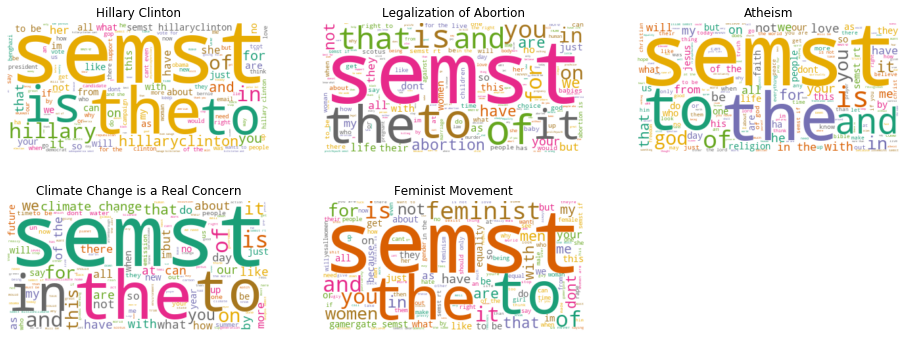

In [257]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

topics = ['Hillary Clinton','Legalization of Abortion', 'Atheism', 'Climate Change is a Real Concern',
          'Feminist Movement']
print(data.columns)
print(data.shape[0])
for index in range(data.shape[0]):
    wc.generate(data.tweet[index])
    
    plt.subplot(2,3, index+1)
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.title(topics[index])
    
plt.show()

In [206]:
!pip install wordcloud

     |████████████████████████████████| 365 kB 11.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.
